<a href="https://colab.research.google.com/github/kirenz/linear-regression/blob/master/notebooks/Linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Institut des Algorithmes du Sénégal


https://github.com/kirenz/linear-regression

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).

please visit our plateform [Institut des Algorithmes du Sénégal](https://www.ias.sn/)!

# In Depth: Linear Regression


![image.png](attachment:image.png)

Just as naive Bayes (discussed earlier in [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

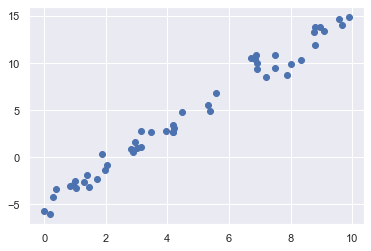

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [ ]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# Linear regression and quality of fit


https://github.com/kirenz/linear-regression/blob/master/python-regression-tutorial.ipynb

In this application we cover linear regression - the fundamental starting point for all regression methods - and how to evaluate the quality of fit of a regression model. Therefore, we quantify the extent to which the predicted outcome value for a given observation is close to the true outcome value for that observation. In the regression setting, the most commonly-used measure is the mean squared error (MSE), which we will cover in detail.

One of the simplest models we use in statistics is the mean. It is a (simple) model because it represents a summary of data. Therefore, we use the mean as a baseline model and compare the quality of fit between the mean and a simple linear regression model with only one predictor. In our application, we use a sample of 20 adult german women from whom we obtained their height and the average height of their parents (height_parents).

Data description (n = 20, p = 5); Variables: name, unique identification number (id), height, average height of parents (height_parents), gender.


Source

The statistical explanations in this tutorial are mainly based on Field (2018).

Field, A. (2018). Discovering statistics using IBM SPSS statistics. Thousand Oaks, CA.

# a. Import data

Take the variable of the other parent

In [ ]:
# Instead of importing data, we will create our own data
df = pd.DataFrame({ 'name': pd.Categorical([ "Stefanie", "Petra", "Stefanie", 
                                             "Manuela", "Nadine", "Sophia",  
                                             "Ellen", "Emilia", "Lina", 
                                             "Marie", "Lena", "Mila",    
                                             "Ida", "Ella", "Pia", 
                                             "Sarah ", "Lia", "Lotta", 
                                             "Emma", "Lina"]),
                       'id': pd.Categorical(["1", "2", "3", "4", "5", "6",  
                                             "7", "8", "9", "10", "11", "12",    
                                             "13", "14", "15", "16 ", "17", "18", 
                                             "19", "20"]),
                          'height': np.array([162, 163, 163, 164, 164, 164, 164, 165, 
                                              165, 165, 165, 165, 165, 166, 166, 166,
                                              166, 167, 167, 168],dtype='int32'),
                  'height_parents': np.array([161, 163, 163, 165, 163, 164, 164, 165, 
                                              165, 165, 166, 167, 165, 166, 166, 166,
                                              166, 166, 167, 168],dtype='int32'),
                                    'gender': 'female' })

#pd.categorical : n differnt elements of category x


# b. Data inspection

In [ ]:
# show all variables in the data set
df.columns

Index(['name', 'id', 'height', 'height_parents', 'gender'], dtype='object')

In [ ]:
# show the first 5 rows (i.e. head of the DataFrame)
df.head(10)

,name,id,height,height_parents,gender
0,Stefanie,1,162,161,female
1,Petra,2,163,163,female
2,Stefanie,3,163,163,female
3,Manuela,4,164,165,female
4,Nadine,5,164,163,female
5,Sophia,6,164,164,female
6,Ellen,7,164,164,female
7,Emilia,8,165,165,female
8,Lina,9,165,165,female
9,Marie,10,165,165,female


In [ ]:
# show the lenght of the variable id (i.e. the number of observations)
len(df["id"])

20

In [ ]:
# we don't need the variable gender 
df = df.drop('gender', axis=1)

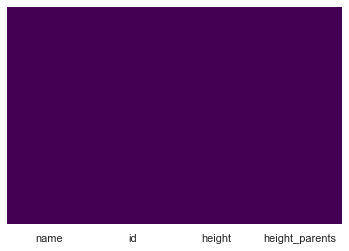

In [ ]:
#Handle missing values


# show missing values (missing values - if present - will be displayed in yellow )
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [ ]:
print(df.isnull().sum())

name              0
id                0
height            0
height_parents    0
dtype: int64


## Relationship between variables

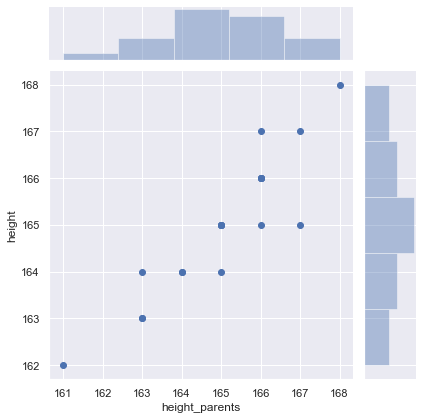

In [ ]:
# check relationship with a joint plot
sns.jointplot(x="height_parents", y="height", data=df, stat_func=None);

We can observe a strong relationship between the average height of the parents and the height of their daughter. Hence, it would make sense to use the variable "height_parents" as a predictor for the outcome variable "height" in a statistical model.

## Model

If we are interested in discovering something about a phenomenon in the real world, we need to collect data to test predictions from our hypotheses about that phenomenon. Testing these hypotheses involves building statistical models of the phenomenon of interest.


It is important that the model accurately represents the real world, otherwise any conclusions we extrapolate to the real-world will be meaningless. Hence, the statistical model should represent the data collected (the observed data) as closely as possible. 

$$Outcome_i = (Model) + error_i$$


This equation means that the data we observe can be predicted from the model we choose to fit plus some amount of error. There are different terms that basically refer to **error** like **residual**, **deviation** or **deviance**. The degree to which a statistical model represents the data collected is known as the **fit of the model** which is closely related to the error of the model.


If we’re interested only in summarizing the outcome, as we are when we compute a **mean**, then we won’t have any variables in the model, only a **parameter** (typically called *b*), so we could write our $Outcome_i = (Model) + error_i$ equation as:

$Outcome_i = (b) + error_i$


---

Let's say we would like to compare the **quality of fit** of two models to predict height: the simple mean and a second model in which we use information about the average height of their parents as a predictor in a linear regression model.

**Model 1: Mean**
  * In the case of the **mean**, the *b* parameter is usually called $\bar{x}$, which leads to:

$height_i = (\bar{x}) + error_i$
  * with

$\bar{x} =  \frac {\sum_{i=1}^n x_{i}}{n}$

**Model 2: Linear Regression**
  * In our second model, we use the variable height of parents as predictor in a linear regression model:

$height_i = (b_0 + b_i \times heightparents_i ) + error_i$

## Model 1: Mean

In [ ]:
# calculate the mean 
sum_x_i = df.height.sum() 
n = len(df["height"])
# formula for mean
x_bar = sum_x_i / n
print(x_bar)

165.0


In [ ]:
# calculate the mean
df["height"].mean()

165.0

In [ ]:
# add the mean (as "average") to our DataFrame
df = df.assign(average = df.height.mean())
df.head(5)

,name,id,height,height_parents,average
0,Stefanie,1,162,161,165.0
1,Petra,2,163,163,165.0
2,Stefanie,3,163,163,165.0
3,Manuela,4,164,165,165.0
4,Nadine,5,164,163,165.0


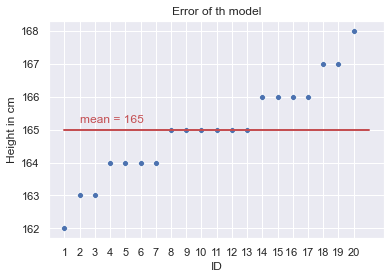

In [ ]:
# create a scatterplot (plt)
plt = sns.scatterplot(x="id", y="height",data=df);
plt.set(xlabel='ID', ylabel='Height in cm', title='Error of th model');
plt.plot([0, 20], [165, 165], linewidth=2, color='r');
plt.text(1, 165.2,'mean = 165', rotation=0, color='r');

# Model 2: Linear Regression

In [ ]:
import statsmodels.formula.api as smf

# fit linear model with statsmodels.formula.api (with R-style formulas) 
lm = smf.ols(formula ='height ~ height_parents', data=df).fit()

# add the regression predictions (as "pred") to our DataFrame
df['pred'] = lm.predict()

In [ ]:
df.head()

,name,id,height,height_parents,average,pred
0,Stefanie,1,162,161,165.0,161.711048
1,Petra,2,163,163,165.0,163.335222
2,Stefanie,3,163,163,165.0,163.335222
3,Manuela,4,164,165,165.0,164.959396
4,Nadine,5,164,163,165.0,163.335222


## Summary of the model outputs


* R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model. It measures the goodness of fit of a regression model. Hence, a higher R-squared indicates the model is a good fit while a lower R-squared indicates the model is not a good fit.


* Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.It measures the proportion of variation explained by only those independent variables that really help in explaining the dependent variable. It penalizes you for adding independent variable that do not help in predicting the dependent variable.

* The log-likelihood value of a regression model is a way to measure the goodness of fit for a model. The higher the value of the log-likelihood, the better a model fits a dataset. The log-likelihood value for a given model can range from negative infinity to positive infinity

* AIC(Lower AIC scores are better) : The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. ... AIC is calculated from: the number of independent variables used to build the model. the maximum likelihood estimate of the model (how well the model reproduces the data)

* BIC : As complexity of the model increases, bic value increases and as likelihood increases, bic decreases. So, lower is better. Bayesian information criterion (BIC) is a criterion for model selection among a finite set of models.

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     88.78
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           2.21e-08
Time:                        16:08:15   Log-Likelihood:                -17.995
No. Observations:                  20   AIC:                             39.99
Df Residuals:                      18   BIC:                             41.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         30.9651     14.226      2.177      0.043       1.077      60.853
height_parents     0.8121      0.086      9.422      0.000       0.631       0.993
==============================================================================
Omnibus:                        4.700   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                2.492
Skew:                          -0.684   Prob(JB):                        0.288
Kurtosis:                       4.058   Cond. No.                     1.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""